<a href="https://colab.research.google.com/github/GerardoDario/Algoritmos_No_Supervisados/blob/main/VC09_M%C3%A9todos_de_an%C3%A1lisis_de_componentes_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VC09. ICA**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


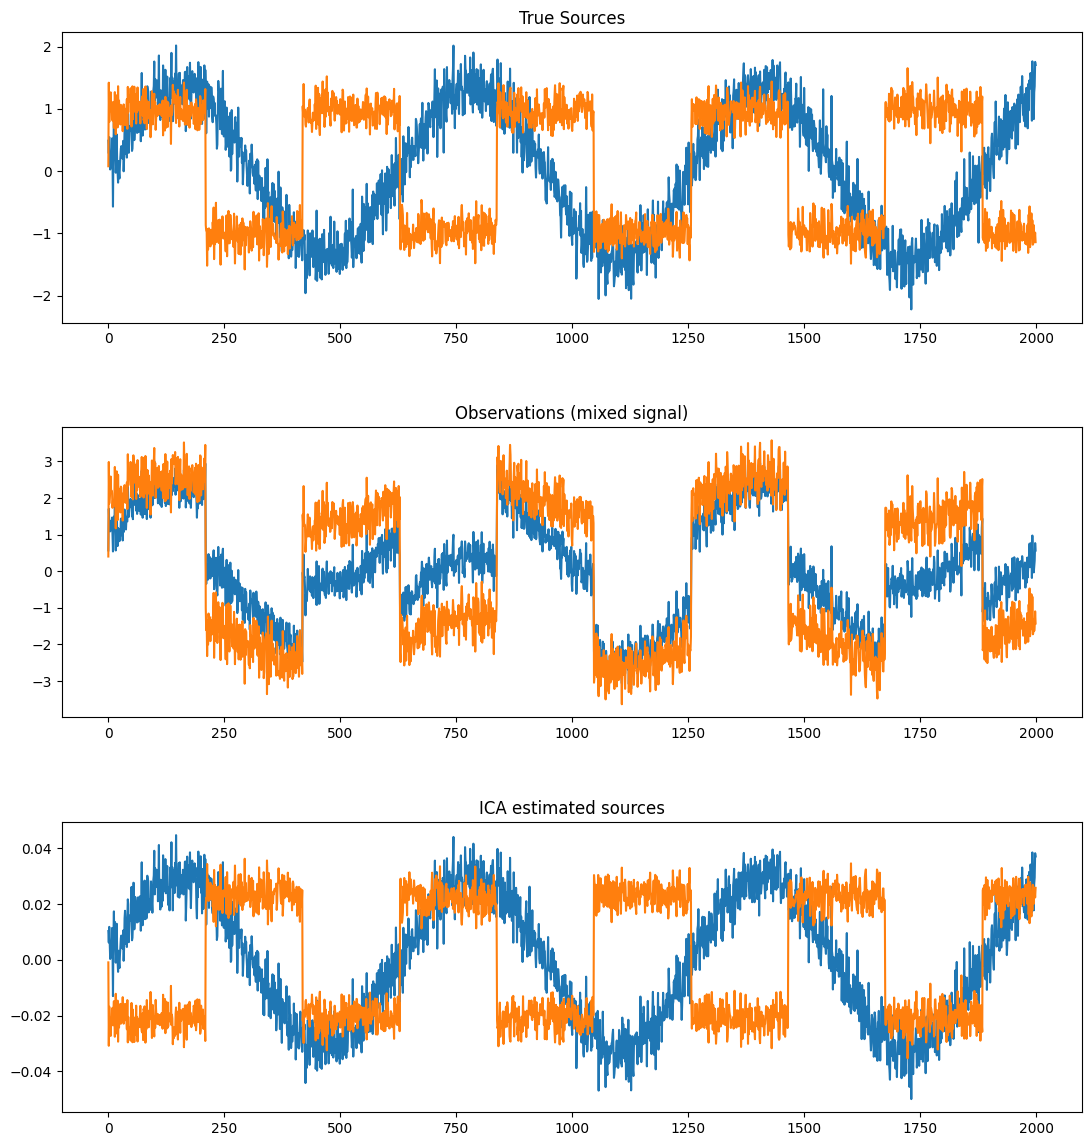

In [ ]:
import numpy as np
import pylab as pl
from sklearn.decomposition import FastICA

###############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 10, n_samples)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations


# Compute ICA
ica = FastICA()
S_ = ica.fit(X).transform(X)  # Get the estimated sources
A_ = ica.mixing_  # Get estimated mixing matrix
#assert np.allclose(X, np.dot(S_, A_.T))

###############################################################################
# Plot results
pl.figure()
pl.subplot(3, 1, 1)
pl.plot(S)
pl.title('True Sources')
pl.subplot(3, 1, 2)
pl.plot(X)
pl.title('Observations (mixed signal)')
pl.subplot(3, 1, 3)
pl.plot(S_)
pl.title('ICA estimated sources')
pl.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
pl.show()

In [ ]:
print(A_)

[[ 43.86825316 -44.04889344]
 [ 20.66187085 -89.09442037]]


In [ ]:
print(A)

[[1.  1. ]
 [0.5 2. ]]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


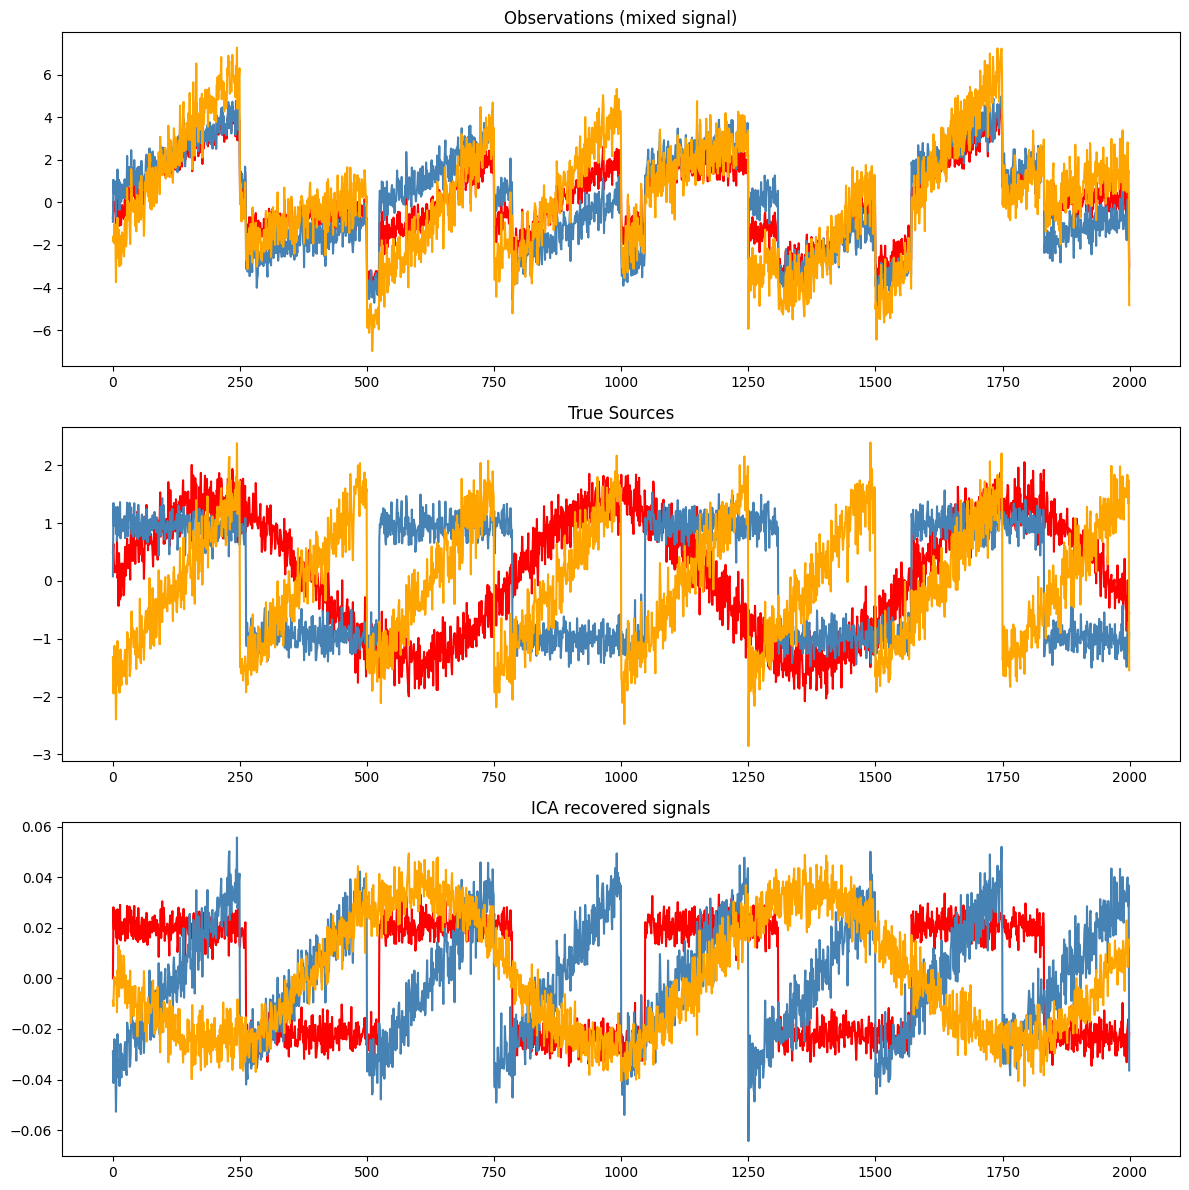

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()